# Projet 3 : Concevez une application au service de la santé publique

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.

Mon idée est de créer une application qui permettrai de venir en aide à ceux qui souhaite limiter leur apport en sucre.

sources:
Les données de l'agence "Santé publique France sont disponibles à l’adresse suivante : 
https://www.santepubliquefrance.fr
Le jeu de données Open Food Facts est disponible sur le site officiel:
https://world.openfoodfacts.org
Les variables sont définies sur:
https://world.openfoodfacts.org/data/data-fields.txt


Sommaire

I/ Nettoyage des données
 - Importer le jeu de donnée 
     - Lire les définitions des variables
     - Trouver une idée d'application
 - Fitrer notre jeu de donnée
 - Traiter les valeurs  aberrantes
 - Traiter les valeurs  manquantes

# I/ Nettoyage des données

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import missingno as msno
from datetime import datetime
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from statistics import mode


Infos sur le fichier à importer:

Le fichier utilise l'encodage Unicode UTF-8. Le caractère de séparation des champs est <tab> (tabulation).

In [2]:
data_initial = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t")

/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Utilisationde la méthode "setOption()" pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)


In [4]:
#Sauvegarde des données sources
data_brut = data_initial.copy(deep=True)

In [5]:
data_brut.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

In [6]:
data_brut.shape

(320772, 162)

In [7]:
#On va regarder le nom des produits
data_brut.product_name.unique()

array(['Farine de blé noir', 'Banana Chips Sweetened (Whole)', 'Peanuts',
       ...,
       'Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint',
       '乐吧泡菜味薯片', 'Tomates aux Vermicelles '], dtype=object)

In [8]:
#On va regarder le nom des produits de manière exhaustive pour avoir une meilleure observation
data_brut.product_name.to_csv("nom_produit.csv")

On observe que dans les noms de produits, il y a des valeurs manquantes, des produits dans une autre langue (japonais, russe,...).
--> ce sont des lignes à supprimer ou imputation

In [9]:
#On va regarder les doublons de ces produits
nb_occ_prod = data_brut["product_name"].value_counts()
nb_occ_prod

Ice Cream                                                           410
Extra Virgin Olive Oil                                              303
Potato Chips                                                        281
Premium Ice Cream                                                   226
Tomato Ketchup                                                      182
                                                                   ... 
Diet Chek, Kountry Mist Citrus Soda, Citrus                           1
Unseasoned Premium Stuffing                                           1
Vitner's, Potato Chips, Jalapeno                                      1
Cassoulet cuisiné à la graisse de canard                              1
Sparkling Water Beverage With Other Natural Flavors, Coconut Lim      1
Name: product_name, Length: 221347, dtype: int64

On constate qu'on a des doublons (occurences) au niveau des produits ou "product_name". Donc on va supprimer les doublons.
On va regarder pour le produit avec le plus d'occurence, à savoir "Ice Cream" quelques lignes, pour avoir une observation. On va regarder également l'occurence ice cream sans majuscule.

In [10]:
print(f"On a {data_brut[(data_brut['product_name'] == 'Ice Cream')].shape[0]} occurence(s) avec la variable product_name Ice Cream.") 
print(f"On a {data_brut[(data_brut['product_name'] == 'ice cream')].shape[0]} occurence(s) avec la variable product_name ice cream.") 

#display(data_brut[(data_brut['product_name'] == 'Ice Cream') | (data_brut['product_name'] == 'ice cream')].head(20))

On a 410 occurence(s) avec la variable product_name Ice Cream.
On a 2 occurence(s) avec la variable product_name ice cream.


On constate que certaines variables catégoriques, ont des majuscules. certaines données qualitatives ont des majuscules à tous les mots, d'autres à certains mots. Il faut prendre en compte cette observation pour l'évaluation des doublons. Il faudra passer toutes les données qualitatives en minuscule et supprimer les doublons en minuscule.

In [11]:
#On va créer une fonction pour calculer pour chaque colonne du dataset son taux de remplissage
def taux_remplissage(tableau):

    tab_colonne = {}
    
    for col in tableau.columns:
        tab_colonne[col] = []
        tab_colonne[col].append(round((tableau[col].notna().sum()/tableau.shape[0])*100,3))
        tab_colonne[col].append(tableau[col].isna().sum())
        tableau_remplissage = pd.DataFrame.from_dict(tab_colonne, orient="index", columns = ["Taux de remplissage", "Nombre de valeurs manquantes"]).sort_values(by="Taux de remplissage", ascending=False)
    return tableau_remplissage

In [12]:
pd.set_option("display.max_rows", 200)
taux_remplissage(data_brut)

,Taux de remplissage,Nombre de valeurs manquantes
last_modified_t,100.000,0
last_modified_datetime,100.000,0
creator,99.999,2
created_t,99.999,3
created_datetime,99.997,9
code,99.993,23
url,99.993,23
states_fr,99.986,46
states_tags,99.986,46
states,99.986,46


In [13]:
#taux de valeurs manquantes dans le jeu de données initial
(data_brut.isna().mean().sum())/len(data_brut.columns)

0.7622157263195134

In [14]:
# Le taux de remplissage moyen de dataset
tx_rempl_data = 100*(1 - data_brut.isna().mean().mean())
print("le taux de remplissage moyen du dataset EdstatsData " + str(tx_rempl_data))

le taux de remplissage moyen du dataset EdstatsData 23.77842736804866


In [15]:
# Doublon avec toutes les colonnes du dataframe
data_brut.duplicated(keep=False).sum()

0

<AxesSubplot:>

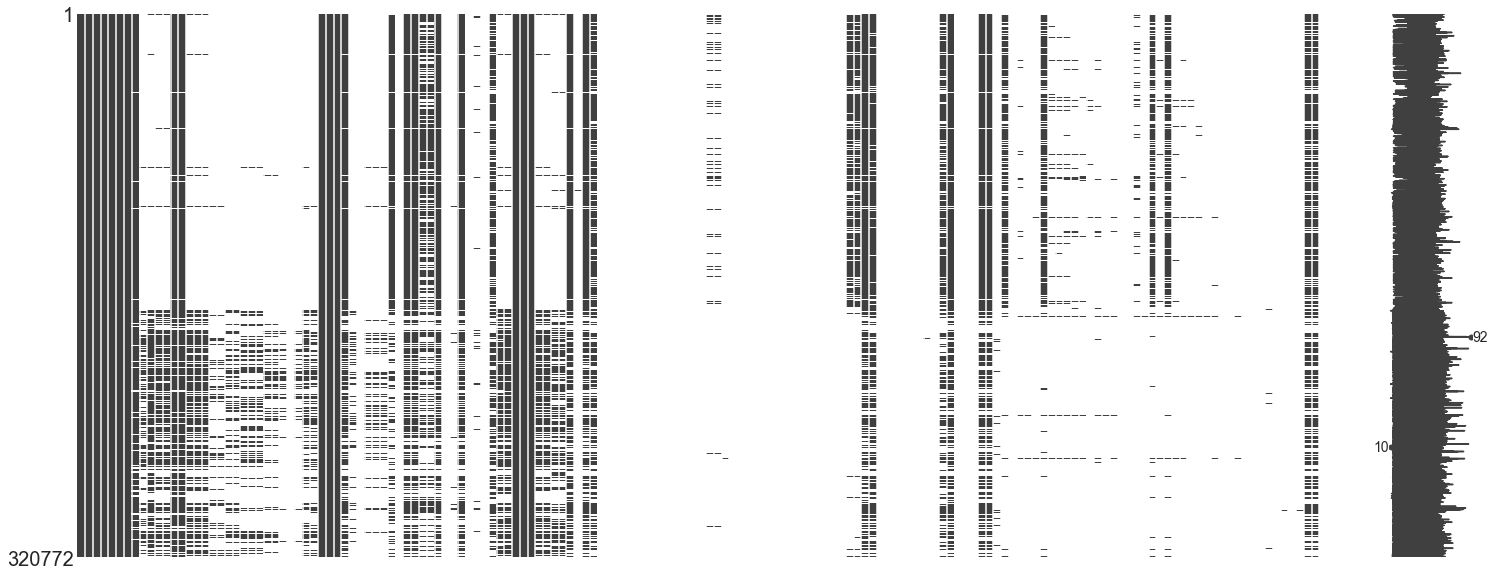

In [16]:
msno.matrix(data_brut)

In [17]:
#On va regarder le type des colonnes
data_brut.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [18]:
#exporter le type des colonnes pour avoir une visualisation globale 
data_brut.dtypes.to_csv("type.csv")

In [19]:
#variables numériques
data_brut.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

In [20]:
#variables catégoriques/qualitatives
data_brut.describe(include="O")

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives,additives_tags,additives_fr,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
count,320749,320749,320770,320769,320763,320772,320772,303010,52795,104819,78960,78961,292360,292352,84410,84389,84411,22190,22153,36501,36495,46559,46644,46666,29306,29303,18803,23,20320,58193,51722,320492,320492,320492,248962,28344,19,24353,24329,24352,211331,248905,154680,154680,4835,11696,221210,91513,94491,320726,320726,320726,84366,84366,75836,75836
unique,320638,320749,3535,189636,189568,180639,180495,221347,38584,13826,14547,12064,58784,50253,36982,21142,21152,4840,4372,7308,6736,18114,13653,13655,8462,8158,1602,3,2572,5120,3259,1434,725,722,205520,12939,19,8378,3578,3584,25423,196069,41537,41537,14,160,5,14,42,1021,1021,1021,3543,3543,75836,75836
top,9800892204,http://world-fr.openfoodfacts.org/produit/5051...,usda-ndb-import,1489077120,2017-03-09T10:37:09Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,Carton,"sachet,plastique",Carrefour,carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits",France,france,France,france,"Organic, EU Organic, fr:AB Agriculture Biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Bio,Bio européen,AB Agriculture Biologique",EMB 56251E,emb-56251e,"47.633333,-2.666667",c,theix-morbihan-france,France,Carrefour,US,en:united-states,États-Unis,"Carbonated water, natural flavor.",blé,http://fr.openfoodfacts.org/images/products/30...,Fruits à coque,en:nuts,Fruits à coque,240 ml (8 fl oz),[ extra-virgin-olive-oil -> en:extra-virgin-o...,en:e322,E322 - Lécithines,huile-de-palme,e160a-beta-carotene,d,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:beverages,Boissons,http://fr.openfoodfacts.org/images/products/03...,http://fr.openfoodfacts.org/images/products/84...
freq,2,1,169868,20,20,33,33,410,201,4669,2153,3959,2978,3149,301,802,802,5171,5303,9371,9451,3223,5311,5311,218,218,279,9,270,11762,6465,169928,172998,172998,222,1279,1,1240,2051,2051,5496,397,8264,8264,4586,2843,62763,22624,22624,168905,168905,168905,6054,6054,1,1


### Suppression des colonnes vides

In [21]:
#on sauvegarde data_brut et on supprime les colonnes vides
data_nodupli= data_brut.copy(deep=True)

cols_vides = [col for col in data_nodupli.columns if data_nodupli[col].isnull().all()]

data_nodupli.drop(cols_vides,axis=1,inplace=True)

In [22]:
data_nodupli.shape

(320772, 146)

On a supprimé 16 colonnes (162-146) qui étaient entièrements vides.

### Suppression des doublons

In [23]:
#On supprime également les doublons au niveau des lignes
data_nodupli = data_nodupli.drop_duplicates(subset=["product_name"], keep="last")

In [24]:
data_nodupli.shape

(221348, 146)

On a supprimé 99424 doublons au niveau des lignes

On va observe que deux colonnes sont au format "timestamp" et deux autres au format "datetime"
- fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)
- fields that end with _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ

In [25]:
data_nodupli.iloc[:,data_nodupli.columns.str.endswith('_t')].head()

,created_t,last_modified_t
1,1489069957,1489069957
3,1489055731,1489055731
5,1489055651,1489055651
8,1489055651,1489055651
10,1489055731,1489055731


In [26]:
data_nodupli.iloc[:,data_nodupli.columns.str.endswith('_datetime')].head()

,created_datetime,last_modified_datetime
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
3,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z
5,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z
8,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z
10,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z


On constate que les deux colonnes au format "timestamp" ont les mêmes numéros donc sont aux mêmes date. Egalement les deux autres au format "datetime" ont les mêmes dates. Il faudra en garder une sur deux pour éviter les redondances.
On peut supprimer "created_datetime" et "created_t"

On peut supprimer la variable avec une extension autre que française, "nutrition-score-uk_100g"
On supprime les variables qui ne sont pas pertinentes pour l'analyse de donnée comme "creator"

On supprime les colonnes "created_datetime", "created_t" et "nutrition-score-uk_100g".

In [27]:
data_nodupli = data_nodupli.drop(columns=["creator","created_datetime", "created_t","nutrition-score-uk_100g"])

In [28]:
data_nodupli.shape

(221348, 142)

# Choix des variables pertinentes

On va regarder le taux de remplissage des variables du dataset.

In [29]:
taux_remplissage(data_nodupli)

,Taux de remplissage,Nombre de valeurs manquantes
last_modified_t,100.000,0
last_modified_datetime,100.000,0
product_name,100.000,1
code,99.998,4
url,99.998,4
states,99.989,25
states_tags,99.989,25
states_fr,99.989,25
countries_fr,99.909,201
countries,99.909,201


Afin de caractériser les différentes variables que nous allons mettre en place pour notre application, nous allons filtré les variables (qualitatives) qui nous informe de manière générale sur le produit et qui ont un taux de remplissage supérieur à 60%, à savoir:
- le "code" : nous informe sur le code à barre du produit;
- l' "url" nous renvoie sur la page du produit sur le site "Open Food Facts";
- le "product_name" donne le nom du produit;
- nutrition-score-fr_100g correspond au Nutri-Score - Score nutritionnel
- nutrition_grade_fr correspond à la qualité nutritionnelle (noté de "a" à "e");


Nous pouvons choisir les variables (quantitatives) suivantes dans le cadre de notre application et qui ont un taux de remplissage supérieur à 60%, à savoir les variables associés à la notion de sucre et d'énergie:

- energy_100g
- carbohydrates_100g
- sugars_100g

In [30]:
# On va créer un dataframe qui regroupe les variables pertinentes pour l'application
data_outlier= pd.DataFrame(data_nodupli, columns = ["product_name","code","url","nutrition_grade_fr", 
                                                    "nutrition-score-fr_100g","energy_100g", "sugars_100g","carbohydrates_100g"]) 

data_outlier

,product_name,code,url,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,sugars_100g,carbohydrates_100g
1,Banana Chips Sweetened (Whole),4530,http://world-fr.openfoodfacts.org/produit/0000...,d,14.0,2243.0,14.29,64.29
3,Organic Salted Nut Mix,16087,http://world-fr.openfoodfacts.org/produit/0000...,d,12.0,2540.0,3.57,17.86
5,Breadshop Honey Gone Nuts Granola,16100,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,1933.0,11.54,63.46
8,Organic Dark Chocolate Minis,16193,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,2406.0,42.50,55.00
10,Organic Adzuki Beans,16612,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,1393.0,NaN,62.50
...,...,...,...,...,...,...,...,...
320767,Tomato & ricotta,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,NaN,NaN,NaN,NaN,NaN
320768,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",99567453,http://world-fr.openfoodfacts.org/produit/9956...,b,0.0,0.0,0.00,0.00
320769,乐吧泡菜味薯片,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,NaN,NaN,NaN,NaN,NaN
320770,Tomates aux Vermicelles,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,NaN,NaN,NaN,NaN,NaN


In [31]:
data_outlier["energy_100g"]

1         2243.0
3         2540.0
5         1933.0
8         2406.0
10        1393.0
           ...  
320767       NaN
320768       0.0
320769       NaN
320770       NaN
320771    2092.0
Name: energy_100g, Length: 221348, dtype: float64

In [32]:
taux_remplissage(data_outlier)

,Taux de remplissage,Nombre de valeurs manquantes
product_name,100.000,1
code,99.998,4
url,99.998,4
energy_100g,83.261,37052
sugars_100g,78.399,47813
carbohydrates_100g,76.557,51890
nutrition_grade_fr,71.190,63771
nutrition-score-fr_100g,71.190,63771


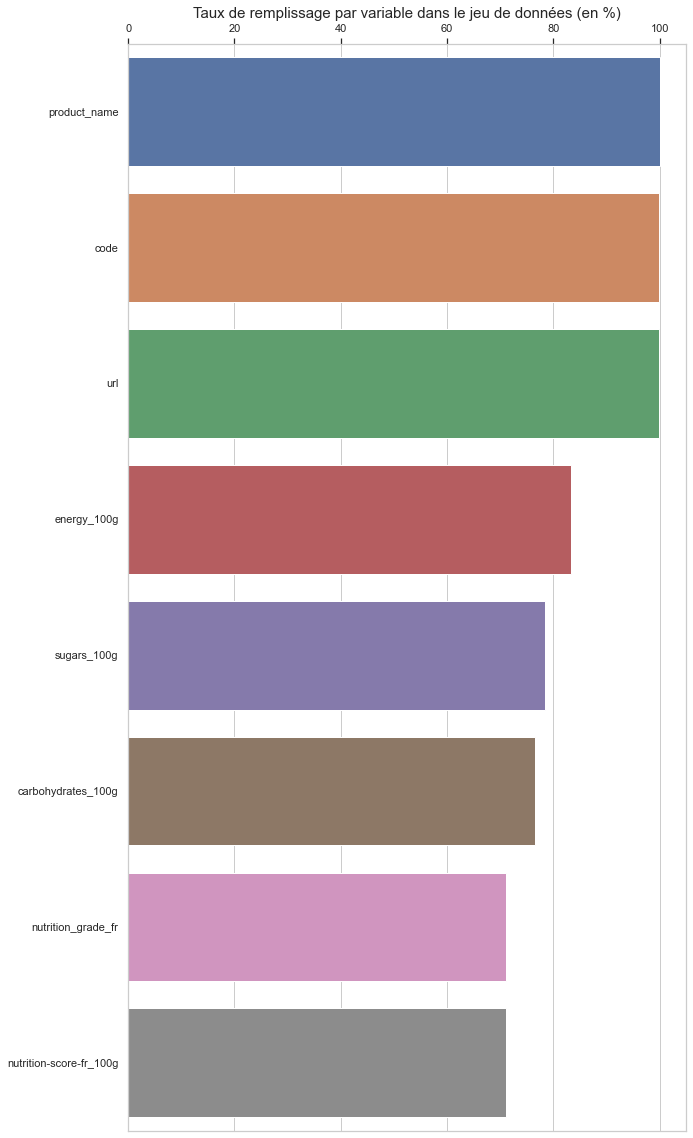

In [33]:
tx_rempl =(1-data_outlier.isna()).sum().divide(data_outlier.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 20))
ax = sns.barplot(y = tx_rempl.index, x=tx_rempl.values)
ax.xaxis.set_ticks_position("top")
plt.title('Taux de remplissage par variable dans le jeu de données (en %)', size=15)
plt.show()


## Suppression des valeurs aberrantes

Dans un premier temps, on va regarder les "nutrition facts",  d'après leur définition, ce sont des variables dont l'apports nutritionnels (nutrition facts) est mesurée en gramme. Le nom de la variable se termine par _100g, ce qui veut dire que le calcul de la quantité du nutriment correspondant est basé sur 100 grammes. Et donc la donnée de la variable ne doit pas dépasser logiquement les 100 grammes. Sauf pour la variable "nutrition-score-fr_100g" où la valeur nutritionnelle de l'aliment est sur une échelle allant de -15 (meilleure option nutritionnelle) à +40 points (option nutritionnelle moins bonne).

In [34]:
data_outlier_100g = data_outlier[(data_outlier["nutrition-score-fr_100g"] > 40)
                              | (data_outlier["sugars_100g"] > 100)
                              | (data_outlier["carbohydrates_100g"] > 100)
                              | (data_outlier["energy_100g"] > 3800)
                              | (data_outlier["nutrition-score-fr_100g"] < -15)
                              | (data_outlier["sugars_100g"] < 0)
                              | (data_outlier["carbohydrates_100g"] < 0) 
                              | (data_outlier["energy_100g"] < 0) 
                                ] 

print(f"Nombre de ligne(s) contenant au moins une valeur négative ou supérieure à 100 grammes sur ces variables: {data_outlier_100g.shape[0]}")
display(data_outlier_100g)

Nombre de ligne(s) contenant au moins une valeur négative ou supérieure à 100 grammes sur ces variables: 262


,product_name,code,url,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,sugars_100g,carbohydrates_100g
698,"Bunge, Clear Liquid Soybean Frying Oil",78684962026,http://world-fr.openfoodfacts.org/produit/0007...,NaN,NaN,3887.0,NaN,0.0
772,Ginger Candy Sweetened With Raw Cane,8274333381,http://world-fr.openfoodfacts.org/produit/0008...,NaN,NaN,4435.0,90.0,90.0
5440,Traditional Dusseldorf Mustard,11150090834,http://world-fr.openfoodfacts.org/produit/0011...,NaN,NaN,5690.0,0.0,0.0
6598,Premium Sesame Oil (100% Pure),11152032603,http://world-fr.openfoodfacts.org/produit/0011...,e,20.0,3887.0,0.0,0.0
6623,100% Pure Sesame Seed Oil,11152068589,http://world-fr.openfoodfacts.org/produit/0011...,NaN,NaN,3887.0,NaN,0.0
...,...,...,...,...,...,...,...,...
316771,Virgin Coconut Oil,8850367991839,http://world-fr.openfoodfacts.org/produit/8850...,NaN,NaN,3887.0,NaN,0.0
316772,100% Virgin Coconut Oil,8850367991914,http://world-fr.openfoodfacts.org/produit/8850...,NaN,NaN,3887.0,NaN,0.0
317635,Banane sèche,8935000901649,http://world-fr.openfoodfacts.org/produit/8935...,c,4.0,1259.0,41.5,139.0
319695,Miel,9310804500189,http://world-fr.openfoodfacts.org/produit/9310...,e,20.0,5925.0,82.0,NaN


In [35]:
data_outlier_100g.to_csv("outliers.csv")

On observe qu'on a des outliers. On va chercher à les supprimer.

In [36]:
data_outlier.drop(axis=0, index=data_outlier_100g.index, inplace=True)
print(f"On a {data_outlier.shape[0]} lignes. ")

On a 221086 lignes. 


/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0, 0.5, 'données')

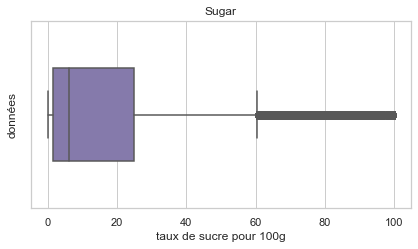

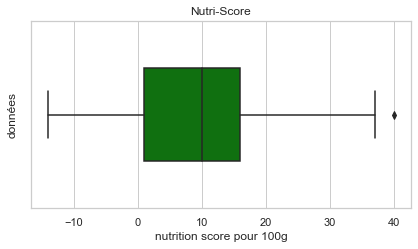

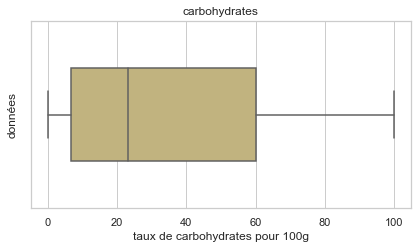

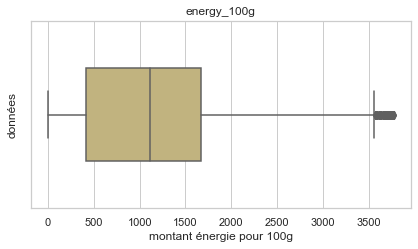

In [37]:

stats_ns_100g=data_outlier["nutrition-score-fr_100g"]
stats_sr_100g=data_outlier["sugars_100g"]
stats_cs_100g=data_outlier["carbohydrates_100g"]
stats_nrj_100g=data_outlier["energy_100g"]

plt.figure(figsize = (15, 20))
plt.subplot(5,2,1)
sns.boxplot(stats_sr_100g, width=0.5, color="m")
plt.title("Sugar")
plt.xlabel("taux de sucre pour 100g")
plt.ylabel("données")

plt.figure(figsize = (15, 20))
plt.subplot(5,2,1)
sns.boxplot(stats_ns_100g, width=0.5, color="green")
plt.title("Nutri-Score")
plt.xlabel("nutrition score pour 100g")
plt.ylabel("données")

plt.figure(figsize = (15, 20))
plt.subplot(5,2,1)
sns.boxplot(stats_cs_100g, width=0.5, color="y")
plt.title("carbohydrates")
plt.xlabel("taux de carbohydrates pour 100g")
plt.ylabel("données")

plt.figure(figsize = (15, 20))
plt.subplot(5,2,1)
sns.boxplot(stats_nrj_100g, width=0.5, color="y")
plt.title("energy_100g")
plt.xlabel("montant énergie pour 100g")
plt.ylabel("données")

### l'unité pour l'énergie est le kilojoule et le gramme pour toutes les autres
source: https://fr.openfoodfacts.org/guide-pour-les-producteurs

1 calorie = 4,184 kilojoules 
https://inspection.canada.ca/etiquetage-des-aliments/etiquetage/industrie/etiquetage-nutritionnel/elements-du-tableau-de-la-valeur-nutritive/fra/1613599715710/1613599936553#s2c1

l'aliment le plus calorifique ce sont les huiles d'avocat, de colza, tournesol, noisette, poisson, etc... : le nombre de kilocalories pour 100 grammes est 900 kcal (soit 3762 kj). On peut se baser sur ces ordres de grandeurs pour chercher les outliers dans la variable energy_100g
https://sante.journaldesfemmes.fr/calories/classement/aliments/calories


carbohydrates_100g : glucides
sugars_100g : sucres

In [38]:
data_outlier.head(10)

,product_name,code,url,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,sugars_100g,carbohydrates_100g
1,Banana Chips Sweetened (Whole),4530,http://world-fr.openfoodfacts.org/produit/0000...,d,14.0,2243.0,14.29,64.29
3,Organic Salted Nut Mix,16087,http://world-fr.openfoodfacts.org/produit/0000...,d,12.0,2540.0,3.57,17.86
5,Breadshop Honey Gone Nuts Granola,16100,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,1933.0,11.54,63.46
8,Organic Dark Chocolate Minis,16193,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,2406.0,42.50,55.00
10,Organic Adzuki Beans,16612,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,1393.0,NaN,62.50
11,Organic Penne Pasta,16650,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,1540.0,NaN,73.68
12,Zen Party Mix,16872,http://world-fr.openfoodfacts.org/produit/0000...,d,12.0,2230.0,3.33,36.67
14,Organic Spicy Punks,17497,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,2536.0,NaN,15.15
15,Cinnamon Nut Granola,18012,http://world-fr.openfoodfacts.org/produit/0000...,b,0.0,1824.0,21.82,60.00
16,Organic Hazelnuts,18050,http://world-fr.openfoodfacts.org/produit/0000...,b,0.0,2632.0,3.57,17.86


Comme vu prédemment, on va passer en minuscule les variables catégoriques pour voir s'il reste des doublons à supprimer.

In [39]:
for col in ["product_name", "nutrition_grade_fr"]:
        data_outlier[col] = data_outlier[col].str.lower()
data_outlier.head()

,product_name,code,url,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,sugars_100g,carbohydrates_100g
1,banana chips sweetened (whole),4530,http://world-fr.openfoodfacts.org/produit/0000...,d,14.0,2243.0,14.29,64.29
3,organic salted nut mix,16087,http://world-fr.openfoodfacts.org/produit/0000...,d,12.0,2540.0,3.57,17.86
5,breadshop honey gone nuts granola,16100,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,1933.0,11.54,63.46
8,organic dark chocolate minis,16193,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,2406.0,42.50,55.00
10,organic adzuki beans,16612,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,1393.0,NaN,62.50


In [40]:
#On supprime les doublons au niveau des lignes
data_outlier = data_outlier.drop_duplicates(subset=["product_name"], keep="last")

In [41]:
print(f"On a {data_outlier.shape[0]} lignes. ")

On a 214204 lignes. 


On a supprimé 5896 doublons avec mettant tous les produits en minuscule.

In [42]:
data_outlier.describe()

,nutrition-score-fr_100g,energy_100g,sugars_100g,carbohydrates_100g
count,152983.000000,179275.000000,168783.000000,165394.000000
mean,9.348817,1132.312930,16.374539,33.225743
std,9.031274,771.107645,21.105942,29.153756
min,-14.000000,0.000000,0.000000,0.000000
25%,1.000000,418.000000,1.495000,6.670000
50%,10.000000,1117.000000,6.250000,23.330000
75%,16.000000,1674.000000,25.000000,60.000000
max,40.000000,3776.000000,100.000000,100.000000


In [43]:
data_outlier.describe(include="O")

,product_name,code,url,nutrition_grade_fr
count,214203,214200,214200,152983
unique,214203,214152,214200,5
top,baiser-schoko törtchen mit feiner kakaocreme,16300166360,http://world-fr.openfoodfacts.org/produit/8480...,d
freq,1,2,1,43690


#On supprime également, comme vu prédemment pour les variables pnns_groups_1 et pnns_groups_2, le terme "unknown" que l'on retrouve pour certains pproduits.

In [44]:
data_outlier.shape

(214204, 8)

### Suppression des valeurs manquantes

In [45]:
data_na_100g = data_outlier[ data_outlier["nutrition-score-fr_100g"].isna()
                              & data_outlier["sugars_100g"].isna()
                              & data_outlier["carbohydrates_100g"].isna()
                              & data_outlier["energy_100g"].isna()
                           ] 
print(f"On a {data_na_100g.shape[0]}  ligne(s) où toutes les variables Apports nutritionnels (_100g) sont absentes.")
display(data_na_100g.head(500))

On a 34170  ligne(s) où toutes les variables Apports nutritionnels (_100g) sont absentes.


,product_name,code,url,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,sugars_100g,carbohydrates_100g
25,real salt granular,18371,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN
46,filet de bœuf,24600,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN
136,twix x2,39259,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN
177,flute,1071894,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN
178,still scottish water,1471762,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
59248,skippy natural peanut butter spread with honey,48001160187,http://world-fr.openfoodfacts.org/produit/0048...,NaN,NaN,NaN,NaN,NaN
59308,skippy creamy peanut butter,48001270688,http://world-fr.openfoodfacts.org/produit/0048...,NaN,NaN,NaN,NaN,NaN
59418,puff pastry steak & ale pie,480925,http://world-fr.openfoodfacts.org/produit/0048...,NaN,NaN,NaN,NaN,NaN
59419,selenium 100 mcg,48107121921,http://world-fr.openfoodfacts.org/produit/0048...,NaN,NaN,NaN,NaN,NaN


In [46]:
data_outlier.drop(axis=0, index=data_na_100g.index, inplace=True)
print(f"On a {data_outlier.shape[0]} lignes. ")

On a 180034 lignes. 


/Users/saidmazzi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Imputation des valeurs manquantes

In [47]:
data_nettoye=data_outlier.copy(deep=True)

In [48]:
taux_remplissage(data_nettoye)

,Taux de remplissage,Nombre de valeurs manquantes
product_name,100.000,0
code,100.000,0
url,100.000,0
energy_100g,99.578,759
sugars_100g,93.751,11251
carbohydrates_100g,91.868,14640
nutrition_grade_fr,84.975,27051
nutrition-score-fr_100g,84.975,27051


In [49]:
#il renvoie une valeur entre -1 et 1. S'il est proche de 1 cela signifie que les variables sont corrélées, 
#proche de 0 que les variables sont décorrélées et proche de -1 qu'elles sont corrélées négativement.
data_nettoye.corr(method ='pearson') 

,nutrition-score-fr_100g,energy_100g,sugars_100g,carbohydrates_100g
nutrition-score-fr_100g,1.000000,0.638923,0.485063,0.274810
energy_100g,0.638923,1.000000,0.353136,0.542580
sugars_100g,0.485063,0.353136,1.000000,0.667391
carbohydrates_100g,0.274810,0.542580,0.667391,1.000000


On constate, en effet, une forte correlation entre la variable sugars_100g et carbohydrates_100g.
En m'information sur les carbohydrates, j'ai pu apprendre qu'il y a deux types carbohydrates, simples et complexes.

- Les carbohydrates simples sont formés en chaines de petits sucres, et sont donc plus rapidement absorbés;
    - comprennent le glucose, le fructose et le galactose qui peuvent à leur tour former du saccharose (= sucre de 
      table), du lactose ou du maltose.
- Les carbohydrates complexes sont composés de plusieurs chaines plus longues de sucres, et peuvent être formé par un ou plus de sucres simples;
    - comprennent l’amidon, le glycogène ainsi que les fibres.
    
Au vu des données dans les variables sugars_100g et carbohydrates_100g et après vérification de la correspondance entre ces 2 variables sur les étiquettes des produits comme les pates par exemple. On peut en déduire que la quantité de glucides (simple et complexe) correspond à la variable carbohydrates_100g et la quantité de sucre (simple) correspond à la variable sugars_100g.
On peut en déduire alors une autre variable qui correspond aux carbohydrates complexes qui est la différence entre les variables carbohydrates_100g et sugars_100g. cette variable on pourra la nommer carbohydrates_complexes_100g.

In [50]:
data_nettoye["carbohydrates_complexes_100g"] = data_nettoye.apply(lambda row: row["carbohydrates_100g"]-row["sugars_100g"], axis=1)
data_nettoye

,product_name,code,url,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,sugars_100g,carbohydrates_100g,carbohydrates_complexes_100g
1,banana chips sweetened (whole),4530,http://world-fr.openfoodfacts.org/produit/0000...,d,14.0,2243.0,14.29,64.29,50.00
3,organic salted nut mix,16087,http://world-fr.openfoodfacts.org/produit/0000...,d,12.0,2540.0,3.57,17.86,14.29
5,breadshop honey gone nuts granola,16100,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,1933.0,11.54,63.46,51.92
8,organic dark chocolate minis,16193,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,2406.0,42.50,55.00,12.50
10,organic adzuki beans,16612,http://world-fr.openfoodfacts.org/produit/0000...,NaN,NaN,1393.0,NaN,62.50,NaN
...,...,...,...,...,...,...,...,...,...
320756,test nf app,989898,http://world-fr.openfoodfacts.org/produit/9898...,NaN,NaN,569.0,9.60,12.20,2.60
320757,amandes,9900000000233,http://world-fr.openfoodfacts.org/produit/9900...,b,0.0,2406.0,3.89,NaN,NaN
320763,thé vert earl grey,99111250,http://world-fr.openfoodfacts.org/produit/9911...,c,2.0,21.0,0.50,0.50,0.00
320768,"mint melange tea a blend of peppermint, lemon ...",99567453,http://world-fr.openfoodfacts.org/produit/9956...,b,0.0,0.0,0.00,0.00,0.00


In [51]:
data_nettoye.to_csv("sucre.csv")

## Imputation des données

On va utiliser plusieurs méthodes (imputation par 0, avec IterativeImputer et KNN).
- D'abord j'impute les valeurs négatives de la colonne  de la variable carbohydrates_complexes_100g par 0 ;

- Puis, j'impute les valeurs manquantes de la colonne catégorique "nutrition_grade_fr" par fillna() avec Mode;

- Avec la fonction corr() on a cherché la corrélation entre les colonnes.  L'imputation des colonnes "carbohydrates_100g", carbohydrates_complexes_100g et "sugars_100g" avec IterativeImputer car ces variables sont fortement corrélées;

- pour finir, j'impute les valeurs manquantes du nutrition-score-fr_100g et nutrition_grade_fr avec KNNImputer.

### Imputation des valeurs négatives de la variable carbohydrates_complexes_100g

In [52]:
data_nettoye.describe()

,nutrition-score-fr_100g,energy_100g,sugars_100g,carbohydrates_100g,carbohydrates_complexes_100g
count,152983.000000,179275.000000,168783.000000,165394.000000,154840.00000
mean,9.348817,1132.312930,16.374539,33.225743,17.79701
std,9.031274,771.107645,21.105942,29.153756,21.65883
min,-14.000000,0.000000,0.000000,0.000000,-100.00000
25%,1.000000,418.000000,1.495000,6.670000,1.00000
50%,10.000000,1117.000000,6.250000,23.330000,7.50000
75%,16.000000,1674.000000,25.000000,60.000000,28.00000
max,40.000000,3776.000000,100.000000,100.000000,100.00000


In [53]:
data_outlier2_100g = data_nettoye[(data_nettoye["carbohydrates_complexes_100g"] < 0)
                                        ] 

print(f"Nombre de ligne(s) contenant au moins une valeur négative sur ces variables: {data_outlier2_100g.shape[0]}")


Nombre de ligne(s) contenant au moins une valeur négative sur ces variables: 504


In [54]:
# remplace la valeur négative dans la nouvelle variable "carbohydrates_complexes_100g" par "0"
data_nettoye[data_nettoye["carbohydrates_complexes_100g"]<0]=0

In [55]:
data_nettoye.describe()

,nutrition-score-fr_100g,energy_100g,sugars_100g,carbohydrates_100g,carbohydrates_complexes_100g
count,153033.000000,179279.000000,168783.000000,165394.000000,154840.000000
mean,9.311155,1129.539472,16.298954,33.181381,17.832016
std,9.031862,772.321992,21.064715,29.168875,21.597901
min,-14.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,411.000000,1.400000,6.670000,1.000000
50%,10.000000,1117.000000,6.190000,23.330000,7.500000
75%,16.000000,1674.000000,25.000000,60.000000,28.000000
max,40.000000,3776.000000,100.000000,100.000000,100.000000


### Imputation des valeurs manquantes de la variable "nutrition_grade_fr " par Fillna() avec Mode

In [56]:
data_nettoye["nutrition_grade_fr"].value_counts()

d    43550
c    31998
e    30185
a    23521
b    23275
0      504
Name: nutrition_grade_fr, dtype: int64

In [57]:
#on peut utiliser la fonction isnull() : data_nettoye["nutrition_grade_fr"].isnull().sum() ou
data_nettoye["nutrition_grade_fr"].isna().sum()

27001

On observe pour la colonne catégorique "nutrition_grade_fr" qu'il y a 5 modes "a", "b", "c", "d", "e". Il y a 483 valeurs à 0 et 26869 de valeurs manquantes. 
  - J'impute les valeurs manquantes par fillna() avec Mode;
  - Je supprime les lignes qui ont des valeurs à "0";

In [58]:
data_nettoye["nutrition_grade_fr"]=data_nettoye["nutrition_grade_fr"].fillna(value=mode(data_nettoye["nutrition_grade_fr"]))

In [59]:
data_nettoye["nutrition_grade_fr"].isnull().sum()

0

In [60]:
my_index = data_nettoye[data_nettoye["nutrition_grade_fr"]==0].index

In [61]:
data_nettoye.drop(my_index, inplace=True)

In [62]:
data_nettoye["nutrition_grade_fr"].value_counts()

d    70551
c    31998
e    30185
a    23521
b    23275
Name: nutrition_grade_fr, dtype: int64

Text(0.5, 0, 'Kilojoules')

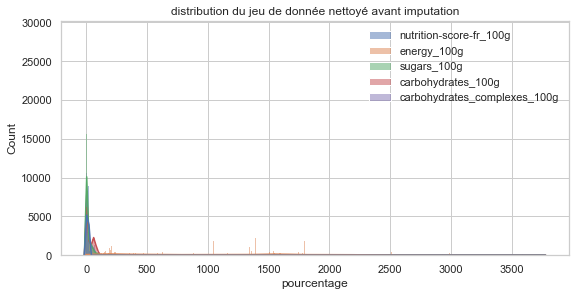

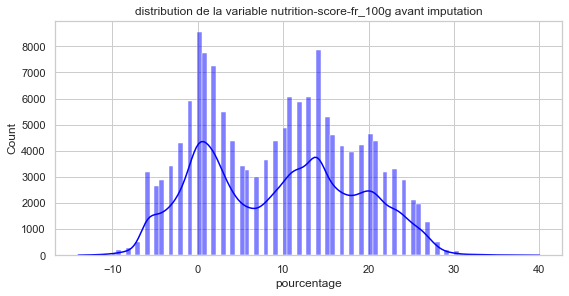

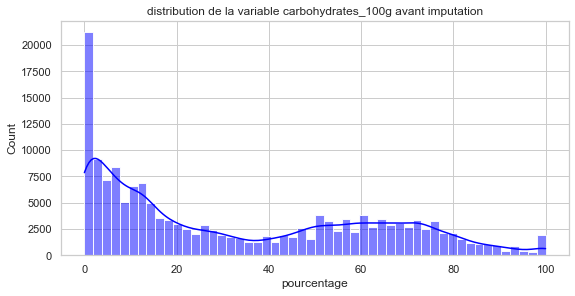

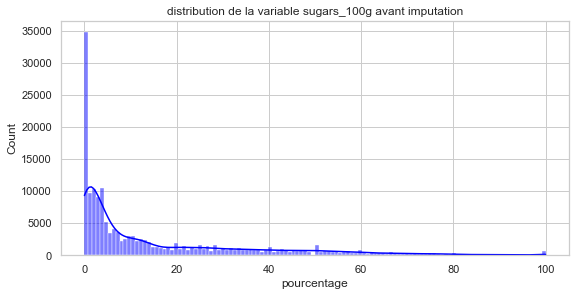

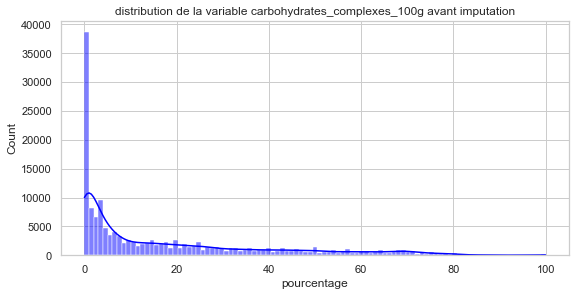

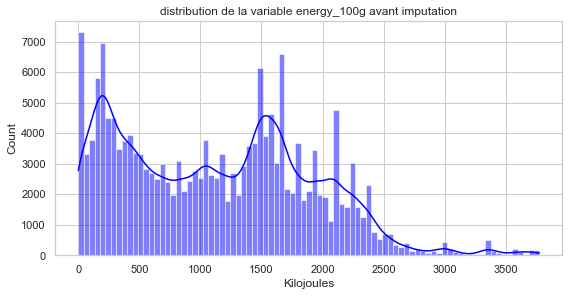

In [63]:
# Graphique du jeu de donnée nettoyé
plt.figure(figsize = (20, 25))
stats_net0=data_nettoye
plt.subplot(5,2,2)
sns.histplot(stats_net0, kde = True, color="blue")
plt.title("distribution du jeu de donnée nettoyé avant imputation")
plt.xlabel("pourcentage")


# Graphique de la variable "nutrition-score-fr_100g"
plt.figure(figsize = (20, 25))
stats_nutr0=data_nettoye["nutrition-score-fr_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_nutr0, kde = True, color="blue")
plt.title("distribution de la variable nutrition-score-fr_100g avant imputation")
plt.xlabel("pourcentage")
# Graphique de la variable "carbohydrates_100g"
plt.figure(figsize = (20, 25))
stats_carbo0=data_nettoye["carbohydrates_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_carbo0, kde = True, color="blue")
plt.title("distribution de la variable carbohydrates_100g avant imputation")
plt.xlabel("pourcentage")
# Graphique de la variable "sugars_100g"
plt.figure(figsize = (20, 25))
stats_sug0=data_nettoye["sugars_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_sug0, kde = True, color="blue")
plt.title("distribution de la variable sugars_100g avant imputation")
plt.xlabel("pourcentage")
# Graphique de la variable "carbohydrates_complexes_100g"
plt.figure(figsize = (20, 25))
stats_carbo_compl0=data_nettoye["carbohydrates_complexes_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_carbo_compl0, kde = True, color="blue")
plt.title("distribution de la variable carbohydrates_complexes_100g avant imputation")
plt.xlabel("pourcentage")
# Graphique de la variable "energy_100g"
plt.figure(figsize = (20, 25))
stats_nrj0=data_nettoye["energy_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_nrj0, kde = True, color="blue")
plt.title("distribution de la variable energy_100g avant imputation")
plt.xlabel("Kilojoules")

## Imputation avec Interative Imputer

<AxesSubplot:xlabel='sugars_100g', ylabel='carbohydrates_100g'>

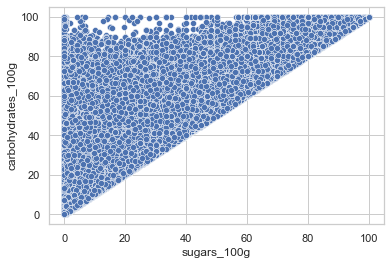

In [64]:
sns.scatterplot(x=data_nettoye["sugars_100g"],y=data_nettoye["carbohydrates_100g"])

<AxesSubplot:xlabel='sugars_100g', ylabel='carbohydrates_complexes_100g'>

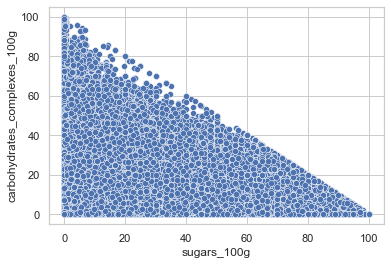

In [65]:
sns.scatterplot(x=data_nettoye["sugars_100g"],y=data_nettoye["carbohydrates_complexes_100g"])

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='carbohydrates_complexes_100g'>

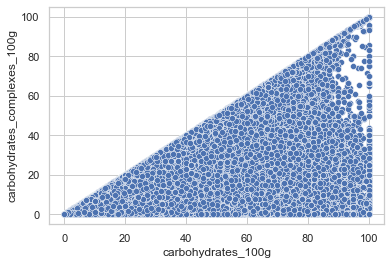

In [66]:
sns.scatterplot(x=data_nettoye["carbohydrates_100g"],y=data_nettoye["carbohydrates_complexes_100g"])

<AxesSubplot:xlabel='sugars_100g', ylabel='nutrition-score-fr_100g'>

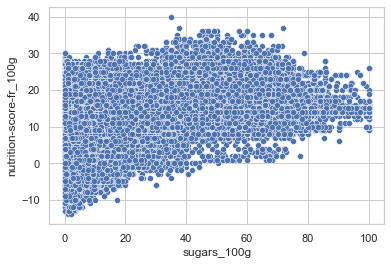

In [67]:
sns.scatterplot(x=data_nettoye["sugars_100g"],y=data_nettoye["nutrition-score-fr_100g"])

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='nutrition-score-fr_100g'>

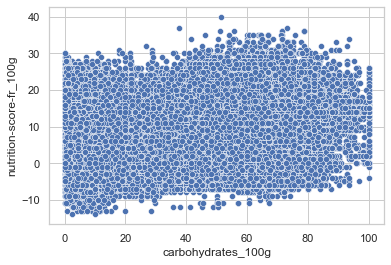

In [68]:
sns.scatterplot(x=data_nettoye["carbohydrates_100g"],y=data_nettoye["nutrition-score-fr_100g"])

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='energy_100g'>

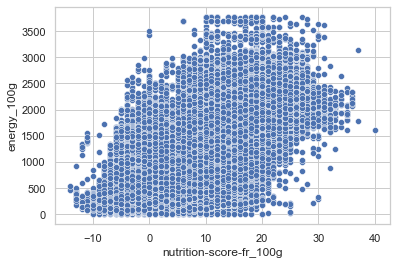

In [69]:
sns.scatterplot(x=data_nettoye["nutrition-score-fr_100g"],y=data_nettoye["energy_100g"])

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='energy_100g'>

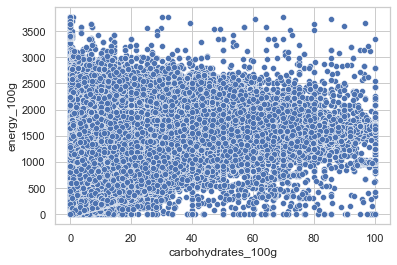

In [70]:
sns.scatterplot(x=data_nettoye["carbohydrates_100g"],y=data_nettoye["energy_100g"])

In [71]:
data_nettoye[["nutrition-score-fr_100g","energy_100g", "carbohydrates_100g","sugars_100g","carbohydrates_complexes_100g"]].isnull().sum()

nutrition-score-fr_100g         27001
energy_100g                       755
carbohydrates_100g              14640
sugars_100g                     11251
carbohydrates_complexes_100g    25194
dtype: int64

In [72]:
itr=IterativeImputer(estimator=LinearRegression())

In [73]:
df_itr = data_nettoye[["nutrition-score-fr_100g","energy_100g", "carbohydrates_100g","sugars_100g","carbohydrates_complexes_100g"]].copy(deep=True)

In [74]:
df_itr = itr.fit_transform(df_itr)

In [75]:
df_itr=pd.DataFrame(df_itr,columns =["nutrition-score-fr_100g","energy_100g", "carbohydrates_100g","sugars_100g","carbohydrates_complexes_100g"])

In [76]:
df_itr.isna().sum()

nutrition-score-fr_100g         0
energy_100g                     0
carbohydrates_100g              0
sugars_100g                     0
carbohydrates_complexes_100g    0
dtype: int64

In [77]:
df_itr.describe()

,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,carbohydrates_complexes_100g
count,179530.000000,179530.000000,179530.000000,179530.000000,179530.000000
mean,8.977600,1132.365334,33.249761,15.376356,17.873406
std,8.949569,769.980852,28.518291,21.748735,20.036013
min,-14.000000,-8.338646,0.000000,-17.476007,0.000000
25%,1.000000,418.000000,7.170000,1.000000,1.800000
50%,9.000000,1117.000000,23.387329,5.630000,13.330000
75%,16.000000,1674.000000,58.438651,25.000000,24.000000
max,40.000000,3776.000000,118.160392,100.000000,100.000000


In [78]:
#Je crée le dataframe data_nettoye_itr
data_nettoye_itr=data_nettoye.copy(deep=True)
#Je supprime les 4 dernières colonnes.
data_nettoye_itr=data_nettoye_itr.drop(columns=["nutrition-score-fr_100g","energy_100g", "carbohydrates_100g","sugars_100g","carbohydrates_complexes_100g"])
#Je merge les deux dataframes
data_nettoye_itr=pd.merge(data_nettoye_itr, df_itr, right_index=True, left_index=True)
data_nettoye_itr

,product_name,code,url,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,carbohydrates_complexes_100g
1,banana chips sweetened (whole),4530,http://world-fr.openfoodfacts.org/produit/0000...,d,12.000000,2540.0,17.860000,3.570000,14.290000
3,organic salted nut mix,16087,http://world-fr.openfoodfacts.org/produit/0000...,d,23.043002,2406.0,55.000000,42.500000,12.500000
5,breadshop honey gone nuts granola,16100,http://world-fr.openfoodfacts.org/produit/0000...,d,16.153415,1540.0,73.680000,55.071349,18.608651
8,organic dark chocolate minis,16193,http://world-fr.openfoodfacts.org/produit/0000...,d,0.000000,1824.0,60.000000,21.820000,38.180000
10,organic adzuki beans,16612,http://world-fr.openfoodfacts.org/produit/0000...,d,3.166232,1582.0,77.780000,2.220000,75.560000
...,...,...,...,...,...,...,...,...,...
179517,pains au lait (x 10) aux pépites de chocolat a...,20376390,http://world-fr.openfoodfacts.org/produit/2037...,d,6.661593,1393.0,66.670000,16.670000,50.000000
179518,pur jus de pomme 100%,20376451,http://world-fr.openfoodfacts.org/produit/2037...,c,9.000000,2155.0,19.597643,1.800000,17.797643
179521,puten-minifilet,20376833,http://world-fr.openfoodfacts.org/produit/2037...,a,0.000000,4.0,18.882133,1.000000,17.882133
179524,nectar multivitaminé linessa light,20377120,http://world-fr.openfoodfacts.org/produit/2037...,d,-4.000000,1643.0,74.800000,2.600000,72.200000


In [79]:
data_nettoye["nutrition_grade_fr"].value_counts()

d    70551
c    31998
e    30185
a    23521
b    23275
Name: nutrition_grade_fr, dtype: int64

In [80]:
data_nettoye_itr["nutrition_grade_fr"].value_counts()

d    47559
e    18927
c    18673
b    13903
a    13509
Name: nutrition_grade_fr, dtype: int64

In [81]:
data_nettoye_itr.describe()

,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,carbohydrates_complexes_100g
count,112571.000000,112571.000000,112571.000000,112571.000000,112571.000000
mean,8.903249,1132.616167,33.007761,15.226857,17.780904
std,8.944580,770.639234,28.330719,21.632068,19.993937
min,-14.000000,-8.338646,0.000000,-17.476007,0.000000
25%,1.000000,418.000000,7.200000,1.000000,1.790000
50%,9.000000,1117.000000,23.200000,5.440000,13.340000
75%,16.000000,1674.000000,57.896881,24.710000,23.330000
max,37.000000,3776.000000,118.096202,100.000000,100.000000


In [82]:
data_outlier3_100g = data_nettoye_itr[(data_nettoye_itr["sugars_100g"] > 100)
                              | (data_nettoye_itr["carbohydrates_100g"] > 100)
                              | (data_nettoye_itr["energy_100g"] > 3800)
                              | (data_nettoye_itr["sugars_100g"] < 0)
                              | (data_nettoye_itr["carbohydrates_100g"] < 0)
                              | (data_nettoye_itr["energy_100g"] < 0)
                                 
                                ] 

print(f"Nombre de ligne(s) contenant au moins une valeur négative ou supérieure à 100 grammes sur ces variables: {data_outlier3_100g.shape[0]}")
display(data_outlier3_100g)

Nombre de ligne(s) contenant au moins une valeur négative ou supérieure à 100 grammes sur ces variables: 4818


,product_name,code,url,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,carbohydrates_complexes_100g
68,orzo rosa marina,32896,http://world-fr.openfoodfacts.org/produit/0000...,d,-1.164262,234.000000,5.560000,-11.979574,17.539574
69,organic refined spelt flour,33015,http://world-fr.openfoodfacts.org/produit/0000...,d,-1.164262,234.000000,5.560000,-11.979574,17.539574
122,organic soft white wheat berries,38584,http://world-fr.openfoodfacts.org/produit/0000...,d,14.000000,1753.000000,105.757432,87.700000,18.057432
148,banana chips sweetened,45308,http://world-fr.openfoodfacts.org/produit/0000...,d,-3.340775,0.000000,3.330000,-14.210141,17.540141
149,granola honey almonds,45346,http://world-fr.openfoodfacts.org/produit/0000...,b,-3.340775,0.000000,3.330000,-14.210141,17.540141
...,...,...,...,...,...,...,...,...,...
179397,tortellini tomate & mozzarella,20351915,http://world-fr.openfoodfacts.org/produit/2035...,c,2.216849,695.848551,0.000000,-17.303702,17.303702
179408,organic rice cake,2035445899993,http://world-fr.openfoodfacts.org/produit/2035...,a,-3.650021,0.000000,0.000000,-17.476007,17.476007
179424,pistaches de californie (xxl),20359607,http://world-fr.openfoodfacts.org/produit/2035...,e,-1.154443,259.000000,3.400000,-14.093324,17.493324
179425,deliziosa hawaii,20359782,http://world-fr.openfoodfacts.org/produit/2035...,c,-0.279492,246.000000,14.000000,-3.699891,17.699891


In [83]:
data_nettoye_itr.drop(axis=0, index=data_outlier3_100g.index, inplace=True)
print(f"On a {data_nettoye_itr.shape[0]} lignes. ")

On a 107753 lignes. 


In [84]:
data_nettoye_itr.isna().sum()

product_name                    0
code                            0
url                             0
nutrition_grade_fr              0
nutrition-score-fr_100g         0
energy_100g                     0
carbohydrates_100g              0
sugars_100g                     0
carbohydrates_complexes_100g    0
dtype: int64

In [85]:
taux_remplissage(data_nettoye_itr)

,Taux de remplissage,Nombre de valeurs manquantes
product_name,100.0,0
code,100.0,0
url,100.0,0
nutrition_grade_fr,100.0,0
nutrition-score-fr_100g,100.0,0
energy_100g,100.0,0
carbohydrates_100g,100.0,0
sugars_100g,100.0,0
carbohydrates_complexes_100g,100.0,0


Text(0.5, 0, 'kilojoules')

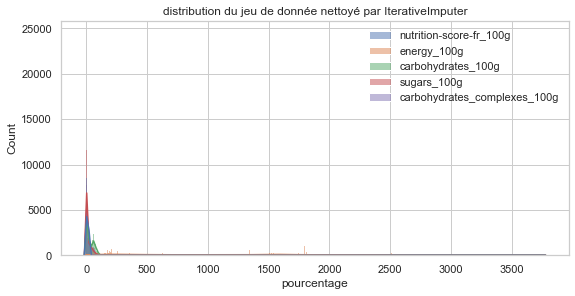

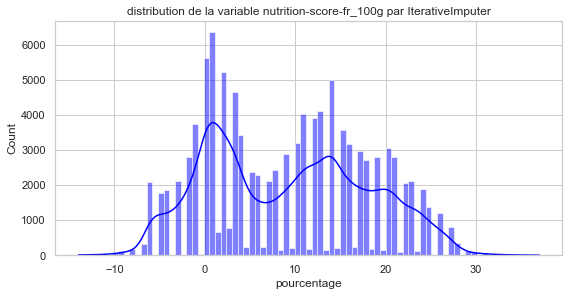

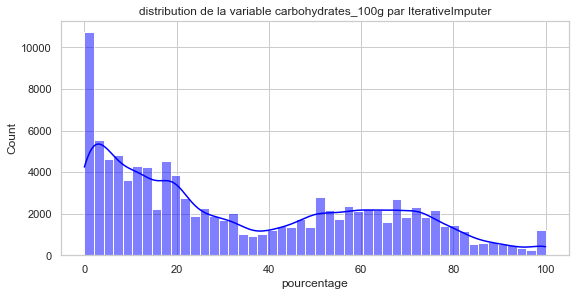

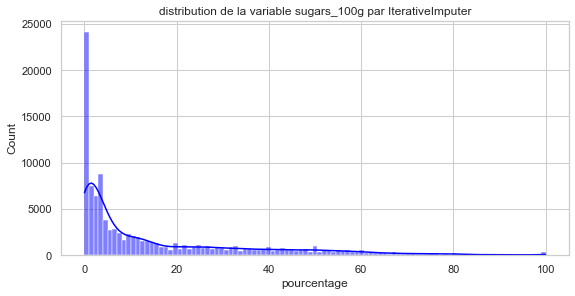

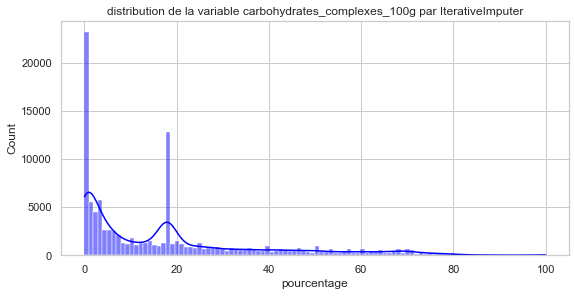

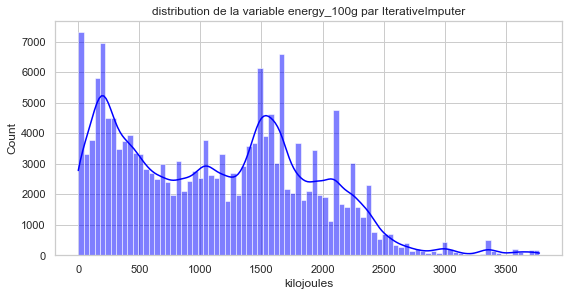

In [86]:
# Graphique du jeu de donnée nettoyé
plt.figure(figsize = (20, 25))
stats_net=data_nettoye_itr
plt.subplot(5,2,2)
sns.histplot(stats_net, kde = True, color="blue")
plt.title("distribution du jeu de donnée nettoyé par IterativeImputer")
plt.xlabel("pourcentage")


# Graphique de la variable "nutrition-score-fr_100g"
plt.figure(figsize = (20, 25))
stats_nutr=data_nettoye_itr["nutrition-score-fr_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_nutr, kde = True, color="blue")
plt.title("distribution de la variable nutrition-score-fr_100g par IterativeImputer")
plt.xlabel("pourcentage")
# Graphique de la variable "carbohydrates_100g"
plt.figure(figsize = (20, 25))
stats_carbo=data_nettoye_itr["carbohydrates_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_carbo, kde = True, color="blue")
plt.title("distribution de la variable carbohydrates_100g par IterativeImputer")
plt.xlabel("pourcentage")
# Graphique de la variable "sugars_100g"
plt.figure(figsize = (20, 25))
stats_sug=data_nettoye_itr["sugars_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_sug, kde = True, color="blue")
plt.title("distribution de la variable sugars_100g par IterativeImputer")
plt.xlabel("pourcentage")
# Graphique de la variable "carbohydrates_complexes_100g"
plt.figure(figsize = (20, 25))
stats_carbo_compl=data_nettoye_itr["carbohydrates_complexes_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_carbo_compl, kde = True, color="blue")
plt.title("distribution de la variable carbohydrates_complexes_100g par IterativeImputer")
plt.xlabel("pourcentage")
# Graphique de la variable "energy_100g"
plt.figure(figsize = (20, 25))
stats_nrj=data_nettoye["energy_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_nrj, kde = True, color="blue")
plt.title("distribution de la variable energy_100g par IterativeImputer")
plt.xlabel("kilojoules")

   ## Imputation des valeurs manquantes par scikit learn KNNImputer

In [88]:
data_nettoye_knn=data_nettoye.copy(deep=True)

In [89]:
df_knn_imp = data_nettoye_knn[["nutrition-score-fr_100g","energy_100g", "carbohydrates_100g","sugars_100g","carbohydrates_complexes_100g"]].copy(deep=True)

In [90]:
df_knn_imp.isna().sum()

nutrition-score-fr_100g         27001
energy_100g                       755
carbohydrates_100g              14640
sugars_100g                     11251
carbohydrates_complexes_100g    25194
dtype: int64

In [91]:
knn_imputer = KNNImputer(n_neighbors=3)

In [92]:
df_knn_imp = knn_imputer.fit_transform(df_knn_imp)

In [93]:
df_knn_imp=pd.DataFrame(df_knn_imp,columns =["nutrition-score-fr_100g","energy_100g", "carbohydrates_100g","sugars_100g","carbohydrates_complexes_100g"])

In [94]:
df_knn_imp.head(5)

,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,carbohydrates_complexes_100g
0,14.000000,2243.0,64.29,14.29,50.000000
1,12.000000,2540.0,17.86,3.57,14.290000
2,18.666667,1933.0,63.46,11.54,51.920000
3,21.000000,2406.0,55.00,42.50,12.500000
4,6.000000,1393.0,62.50,43.27,41.666667


In [95]:
#Je supprime les 4 dernières colonnes.
data_nettoye_knn=data_nettoye_knn.drop(columns=["nutrition-score-fr_100g", "energy_100g","carbohydrates_100g","sugars_100g","carbohydrates_complexes_100g"])
#Je merge les deux dataframes
data_nettoye_knn=pd.merge(data_nettoye_knn, df_knn_imp, right_index=True, left_index=True)
data_nettoye_knn

,product_name,code,url,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,carbohydrates_100g,sugars_100g,carbohydrates_complexes_100g
1,banana chips sweetened (whole),4530,http://world-fr.openfoodfacts.org/produit/0000...,d,12.000000,2540.0,17.860000,3.57,14.290000
3,organic salted nut mix,16087,http://world-fr.openfoodfacts.org/produit/0000...,d,21.000000,2406.0,55.000000,42.50,12.500000
5,breadshop honey gone nuts granola,16100,http://world-fr.openfoodfacts.org/produit/0000...,d,18.666667,1540.0,73.680000,36.15,56.723333
8,organic dark chocolate minis,16193,http://world-fr.openfoodfacts.org/produit/0000...,d,0.000000,1824.0,60.000000,21.82,38.180000
10,organic adzuki beans,16612,http://world-fr.openfoodfacts.org/produit/0000...,d,-5.333333,1582.0,77.780000,2.22,75.560000
...,...,...,...,...,...,...,...,...,...
179517,pains au lait (x 10) aux pépites de chocolat a...,20376390,http://world-fr.openfoodfacts.org/produit/2037...,d,15.333333,1393.0,66.670000,16.67,50.000000
179518,pur jus de pomme 100%,20376451,http://world-fr.openfoodfacts.org/produit/2037...,c,9.000000,2155.0,49.493333,1.80,5.466667
179521,puten-minifilet,20376833,http://world-fr.openfoodfacts.org/produit/2037...,a,0.000000,4.0,9.333333,1.00,10.000000
179524,nectar multivitaminé linessa light,20377120,http://world-fr.openfoodfacts.org/produit/2037...,d,-4.000000,1643.0,74.800000,2.60,72.200000


In [96]:
data_nettoye_knn.isna().sum()

product_name                    0
code                            0
url                             0
nutrition_grade_fr              0
nutrition-score-fr_100g         0
energy_100g                     0
carbohydrates_100g              0
sugars_100g                     0
carbohydrates_complexes_100g    0
dtype: int64

In [97]:
taux_remplissage(data_nettoye_knn)

,Taux de remplissage,Nombre de valeurs manquantes
product_name,100.0,0
code,100.0,0
url,100.0,0
nutrition_grade_fr,100.0,0
nutrition-score-fr_100g,100.0,0
energy_100g,100.0,0
carbohydrates_100g,100.0,0
sugars_100g,100.0,0
carbohydrates_complexes_100g,100.0,0


Text(0.5, 0, 'kilojoules')

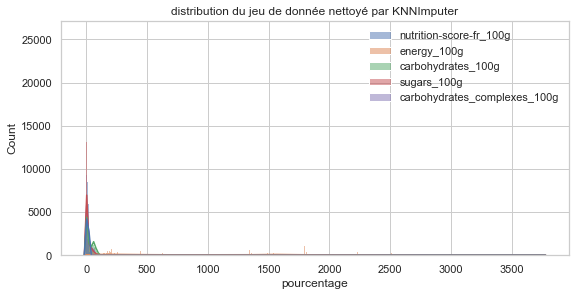

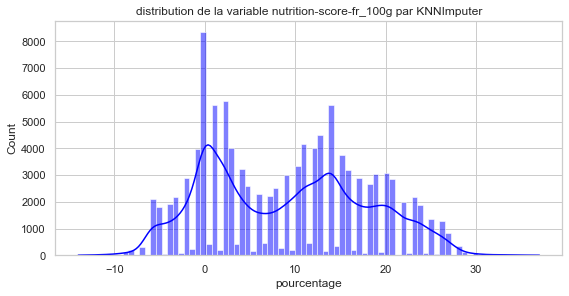

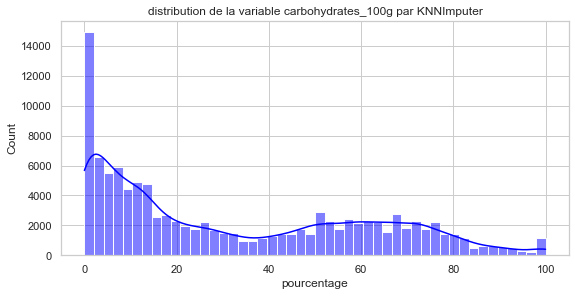

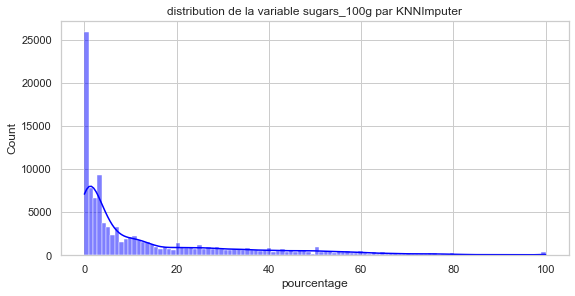

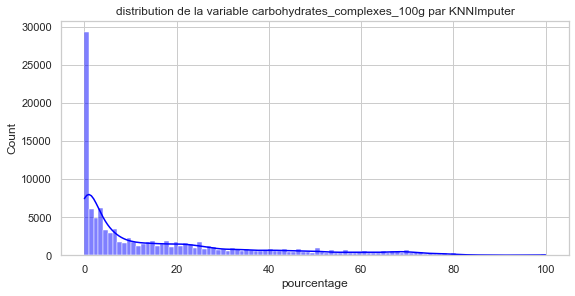

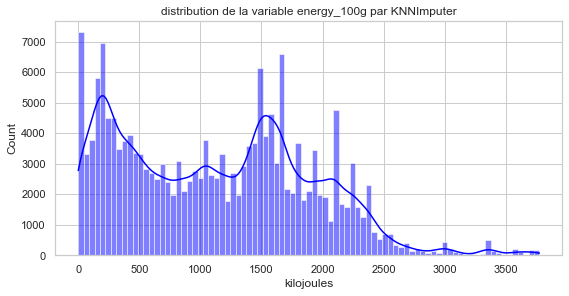

In [98]:
# Graphique du jeu de donnée nettoyé
plt.figure(figsize = (20, 25))
stats_net1=data_nettoye_knn
plt.subplot(5,2,2)
sns.histplot(stats_net1, kde = True, color="blue")
plt.title("distribution du jeu de donnée nettoyé par KNNImputer")
plt.xlabel("pourcentage")


# Graphique de la variable "nutrition-score-fr_100g"
plt.figure(figsize = (20, 25))
stats_nutr1=data_nettoye_knn["nutrition-score-fr_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_nutr1, kde = True, color="blue")
plt.title("distribution de la variable nutrition-score-fr_100g par KNNImputer")
plt.xlabel("pourcentage")
# Graphique de la variable "carbohydrates_100g"
plt.figure(figsize = (20, 25))
stats_carbo1=data_nettoye_knn["carbohydrates_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_carbo1, kde = True, color="blue")
plt.title("distribution de la variable carbohydrates_100g par KNNImputer")
plt.xlabel("pourcentage")
# Graphique de la variable "sugars_100g"
plt.figure(figsize = (20, 25))
stats_sug1=data_nettoye_knn["sugars_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_sug1, kde = True, color="blue")
plt.title("distribution de la variable sugars_100g par KNNImputer")
plt.xlabel("pourcentage")
# Graphique de la variable "carbohydrates_complexes_100g"
plt.figure(figsize = (20, 25))
stats_carbo_compl1=data_nettoye_knn["carbohydrates_complexes_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_carbo_compl1, kde = True, color="blue")
plt.title("distribution de la variable carbohydrates_complexes_100g par KNNImputer")
plt.xlabel("pourcentage")
# Graphique de la variable "energy_100g"
plt.figure(figsize = (20, 25))
stats_nrj1=data_nettoye["energy_100g"]
plt.subplot(5,2,2)
sns.histplot(stats_nrj1, kde = True, color="blue")
plt.title("distribution de la variable energy_100g par KNNImputer")
plt.xlabel("kilojoules")

In [99]:
data_nettoye_knn.shape

(112571, 9)

## Exportation des données du dataset "data_nettoye_knn" dans un fichier .CSV

In [100]:
data_nettoye_knn.to_csv("data_nettoye.csv")